<a href="https://colab.research.google.com/github/mihirtripathi0820/21bds0169_da1_part1_theory/blob/main/21BDS0169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCSE331L Exploratory Data Analysis - Digital Assessment I
# Name: Mihir Tripathi
# Reg. No.: 21BDS0169


# Importing necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

In [26]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/PhDPublications.csv"
df = pd.read_csv(url)
df.head()

,rownames,articles,gender,married,kids,prestige,mentor
0,1,0,male,yes,0,2.52,7
1,2,0,female,no,0,2.05,6
2,3,0,female,no,0,3.75,6
3,4,0,male,yes,1,1.18,3
4,5,0,female,no,0,3.75,26


# 1. Data Dimension and Summary

In [27]:
print("Shape of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nSummary Statistics:\n", df.describe())

Shape of the dataset: (915, 7)

Data Types:
 rownames      int64
articles      int64
gender       object
married      object
kids          int64
prestige    float64
mentor        int64
dtype: object

First 5 Rows:
    rownames  articles  gender married  kids  prestige  mentor
0         1         0    male     yes     0      2.52       7
1         2         0  female      no     0      2.05       6
2         3         0  female      no     0      3.75       6
3         4         0    male     yes     1      1.18       3
4         5         0  female      no     0      3.75      26

Summary Statistics:
          rownames    articles        kids    prestige      mentor
count  915.000000  915.000000  915.000000  915.000000  915.000000
mean   458.000000    1.692896    0.495082    3.103109    8.767213
std    264.282046    1.926069    0.764880    0.984249    9.483916
min      1.000000    0.000000    0.000000    0.755000    0.000000
25%    229.500000    0.000000    0.000000    2.260000    3.00

# 2. Data Handling and Cleaning

In [28]:
print("\nMissing Values:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)


Missing Values:
 rownames    0
articles    0
gender      0
married     0
kids        0
prestige    0
mentor      0
dtype: int64


# Handling missing values (if any)

In [29]:
df.fillna(df.mean(numeric_only=True), inplace=True)

# Reshaping the dataset using Hierarchical Indexing

In [30]:
df.set_index(['gender', 'married'], inplace=True)

In [31]:
print("\nDataset with Hierarchical Indexing:")
print(df.head())


Dataset with Hierarchical Indexing:
                rownames  articles  kids  prestige  mentor
gender married                                            
male   yes             1         0     0      2.52       7
female no              2         0     0      2.05       6
       no              3         0     0      3.75       6
male   yes             4         0     1      1.18       3
female no              5         0     0      3.75      26


In [32]:
grouped = df.groupby(level=[0, 1]).agg({'articles': ['mean', 'sum', 'count']})
print("\nGrouped Statistics (Articles) by Gender and Marital Status:")
print(grouped)


Grouped Statistics (Articles) by Gender and Marital Status:
                articles           
                    mean  sum count
gender married                     
female no       1.387755  272   196
       yes      1.542222  347   225
male   no       1.946903  220   113
       yes      1.863517  710   381


In [33]:
unstacked = grouped.unstack(level=0)
print("\nUnstacked Grouped Data:")
print(unstacked)


Unstacked Grouped Data:
         articles                                  
             mean              sum       count     
gender     female      male female male female male
married                                            
no       1.387755  1.946903    272  220    196  113
yes      1.542222  1.863517    347  710    225  381


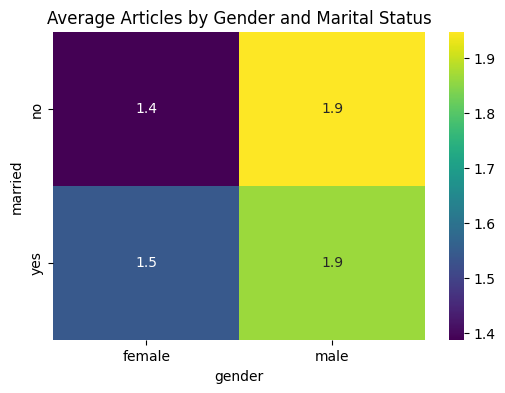

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(unstacked['articles']['mean'], annot=True, cmap='viridis')
plt.title('Average Articles by Gender and Marital Status')
plt.show()

In [35]:
df.reset_index(inplace=True)

#Discretization and binning

# 1. Discretization of 'articles' using Equal-Width Binning

In [43]:
df['articles_bins_width'] = pd.cut(df['articles'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print("\nEqual-Width Binning of 'articles':")
print(df['articles_bins_width'].value_counts())


Equal-Width Binning of 'articles':
articles_bins_width
Very Low     783
Low          123
Medium         5
High           2
Very High      2
Name: count, dtype: int64


# 2. Discretization of 'mentor' using Equal-Frequency Binning

In [44]:
df['mentor_bins_freq'] = pd.qcut(df['mentor'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print("\nEqual-Frequency Binning of 'mentor':")
print(df['mentor_bins_freq'].value_counts())


Equal-Frequency Binning of 'mentor':
mentor_bins_freq
Q1    291
Q3    216
Q4    207
Q2    201
Name: count, dtype: int64


<ipython-input-45-c102fc147312>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mentor_bins_freq', data=df, palette='viridis')


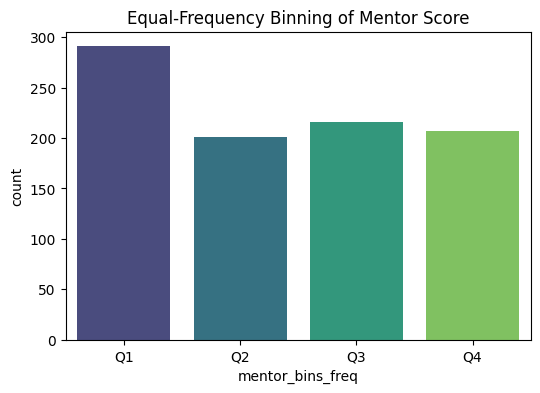

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='mentor_bins_freq', data=df, palette='viridis')
plt.title('Equal-Frequency Binning of Mentor Score')
plt.show()

# 3. Custom Binning for 'prestige'

In [46]:
bins = [0, 1.5, 2.5, 3.5, 5]
labels = ['Low', 'Average', 'Good', 'Excellent']
df['prestige_category'] = pd.cut(df['prestige'], bins=bins, labels=labels)


In [47]:
print("\nCustom Binning for 'prestige':")
print(df['prestige_category'].value_counts())


Custom Binning for 'prestige':
prestige_category
Excellent    352
Good         284
Average      237
Low           42
Name: count, dtype: int64


<ipython-input-48-46df2943d444>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prestige_category', data=df, palette='cividis')


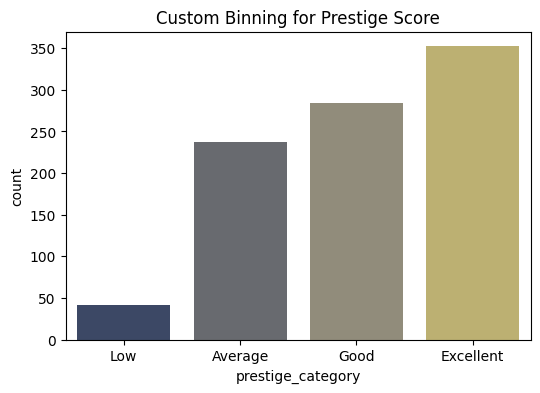

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='prestige_category', data=df, palette='cividis')
plt.title('Custom Binning for Prestige Score')
plt.show()

# 4. Display Modified Dataset with Bins

In [49]:
print("\nDataset with Discretization Columns:")
print(df[['articles', 'articles_bins_width', 'mentor', 'mentor_bins_freq', 'prestige', 'prestige_category']].head())


Dataset with Discretization Columns:
   articles articles_bins_width  mentor mentor_bins_freq  prestige  \
0         0            Very Low       7               Q3      2.52   
1         0            Very Low       6               Q2      2.05   
2         0            Very Low       6               Q2      3.75   
3         0            Very Low       3               Q1      1.18   
4         0            Very Low      26               Q4      3.75   

  prestige_category  
0              Good  
1           Average  
2         Excellent  
3               Low  
4         Excellent  


# Outlier detection and filtering

# 1. Outlier Detection using IQR Method

In [50]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [51]:
articles_outliers = detect_outliers_iqr(df, 'articles')
mentor_outliers = detect_outliers_iqr(df, 'mentor')

In [52]:
print(f"\nOutliers in 'articles' column:\n{articles_outliers}")
print(f"\nOutliers in 'mentor' column:\n{mentor_outliers}")


Outliers in 'articles' column:
     gender  married  rownames  articles  kids  prestige  mentor  \
877       1        1       878         6     1      4.62       8   
878       0        1       879         6     0      2.10      36   
879       0        1       880         6     2      1.86      38   
880       1        1       881         6     0      4.34       9   
881       0        1       882         6     0      4.29      24   
882       1        1       883         6     2      2.51      11   
883       1        1       884         6     1      2.96      13   
884       1        0       885         6     0      4.29      18   
885       1        0       886         6     0      3.40      14   
886       0        0       887         6     0      4.54      12   
887       1        1       888         6     1      3.85      16   
888       0        0       889         6     0      3.15       9   
889       0        0       890         6     0      4.54      15   
890       1     

# Visualize Outliers using Boxplots

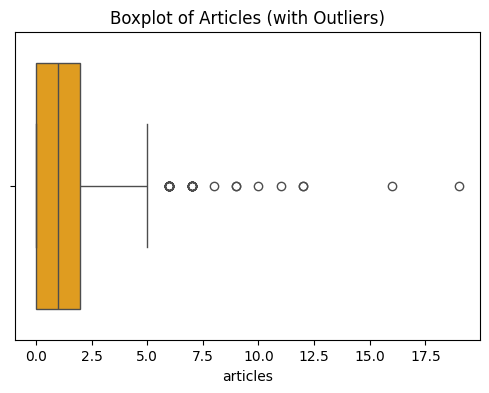

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['articles'], color='orange')
plt.title('Boxplot of Articles (with Outliers)')
plt.show()

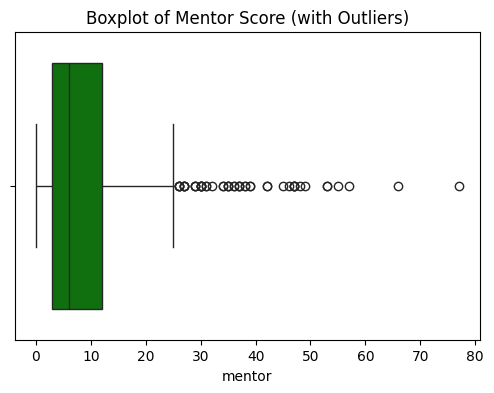

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['mentor'], color='green')
plt.title('Boxplot of Mentor Score (with Outliers)')
plt.show()

# 2. Filtering Out Outliers

In [55]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [56]:
df_clean = remove_outliers_iqr(df, 'articles')
df_clean = remove_outliers_iqr(df_clean, 'mentor')

In [57]:
print("\nShape of Dataset Before Removing Outliers:", df.shape)
print("Shape of Dataset After Removing Outliers:", df_clean.shape)


Shape of Dataset Before Removing Outliers: (915, 10)
Shape of Dataset After Removing Outliers: (821, 10)


# 3. Visualize After Outlier Removal

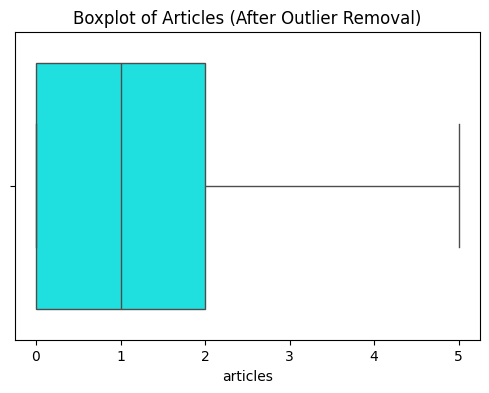

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['articles'], color='cyan')
plt.title('Boxplot of Articles (After Outlier Removal)')
plt.show()

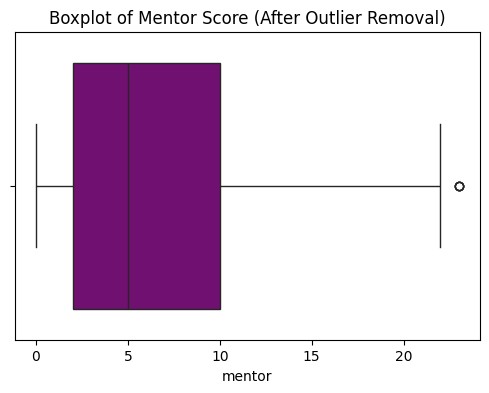

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['mentor'], color='purple')
plt.title('Boxplot of Mentor Score (After Outlier Removal)')
plt.show()

# 4. Display Cleaned Dataset

In [60]:
print("\nCleaned Dataset (Outliers Removed):")
print(df_clean.head())


Cleaned Dataset (Outliers Removed):
   gender  married  rownames  articles  kids  prestige  mentor  \
0       1        1         1         0     0      2.52       7   
1       0        0         2         0     0      2.05       6   
2       0        0         3         0     0      3.75       6   
3       1        1         4         0     1      1.18       3   
5       0        1         6         0     2      3.59       2   

  articles_bins_width mentor_bins_freq prestige_category  
0            Very Low               Q3              Good  
1            Very Low               Q2           Average  
2            Very Low               Q2         Excellent  
3            Very Low               Q1               Low  
5            Very Low               Q1         Excellent  


In [61]:
df_clean.to_csv('PhDPublications_Cleaned.csv', index=False)

# 3. Univariate Analysis

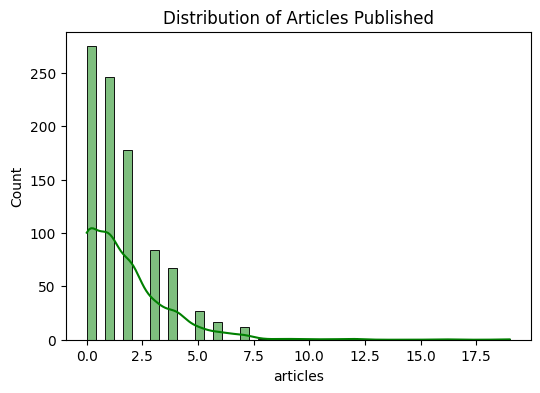

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df['articles'], kde=True, color='green')
plt.title('Distribution of Articles Published')
plt.show()

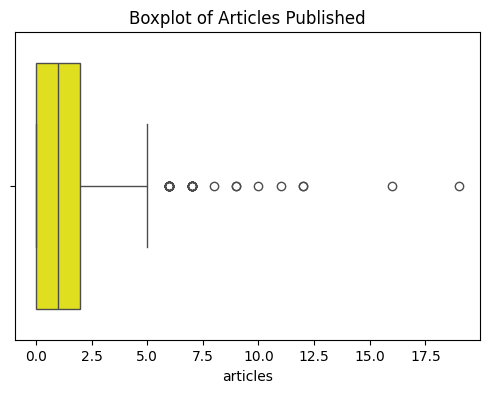

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['articles'], color='yellow')
plt.title('Boxplot of Articles Published')
plt.show()

# 4. Bivariate Analysis

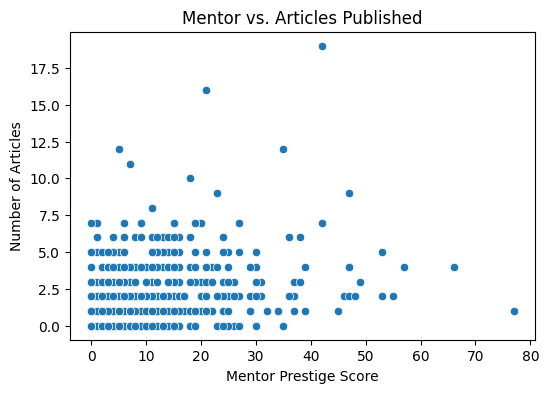

In [38]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='mentor', y='articles', data=df)
plt.title('Mentor vs. Articles Published')
plt.xlabel('Mentor Prestige Score')
plt.ylabel('Number of Articles')
plt.show()

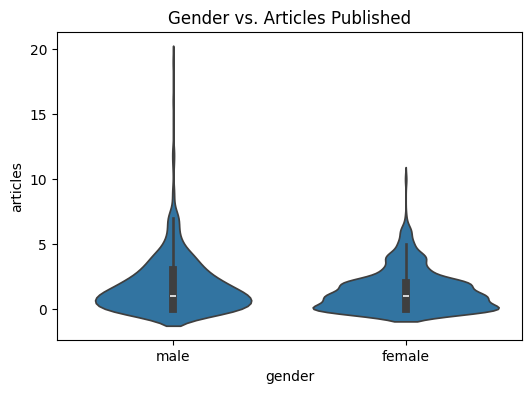

In [39]:
plt.figure(figsize=(6,4))
sns.violinplot(x='gender', y='articles', data=df)
plt.title('Gender vs. Articles Published')
plt.show()

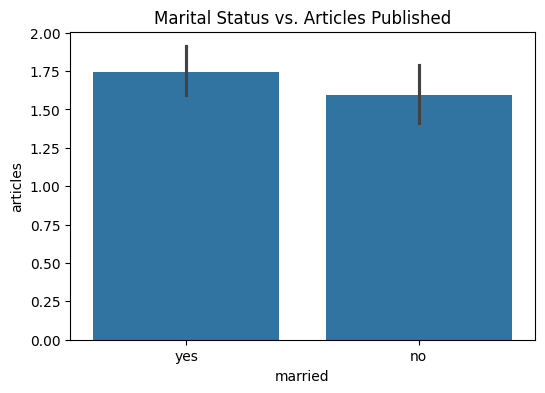

In [40]:
plt.figure(figsize=(6,4))
sns.barplot(x='married', y='articles', data=df)
plt.title('Marital Status vs. Articles Published')
plt.show()

# 5. Multivariate Analysis

<Figure size 800x600 with 0 Axes>

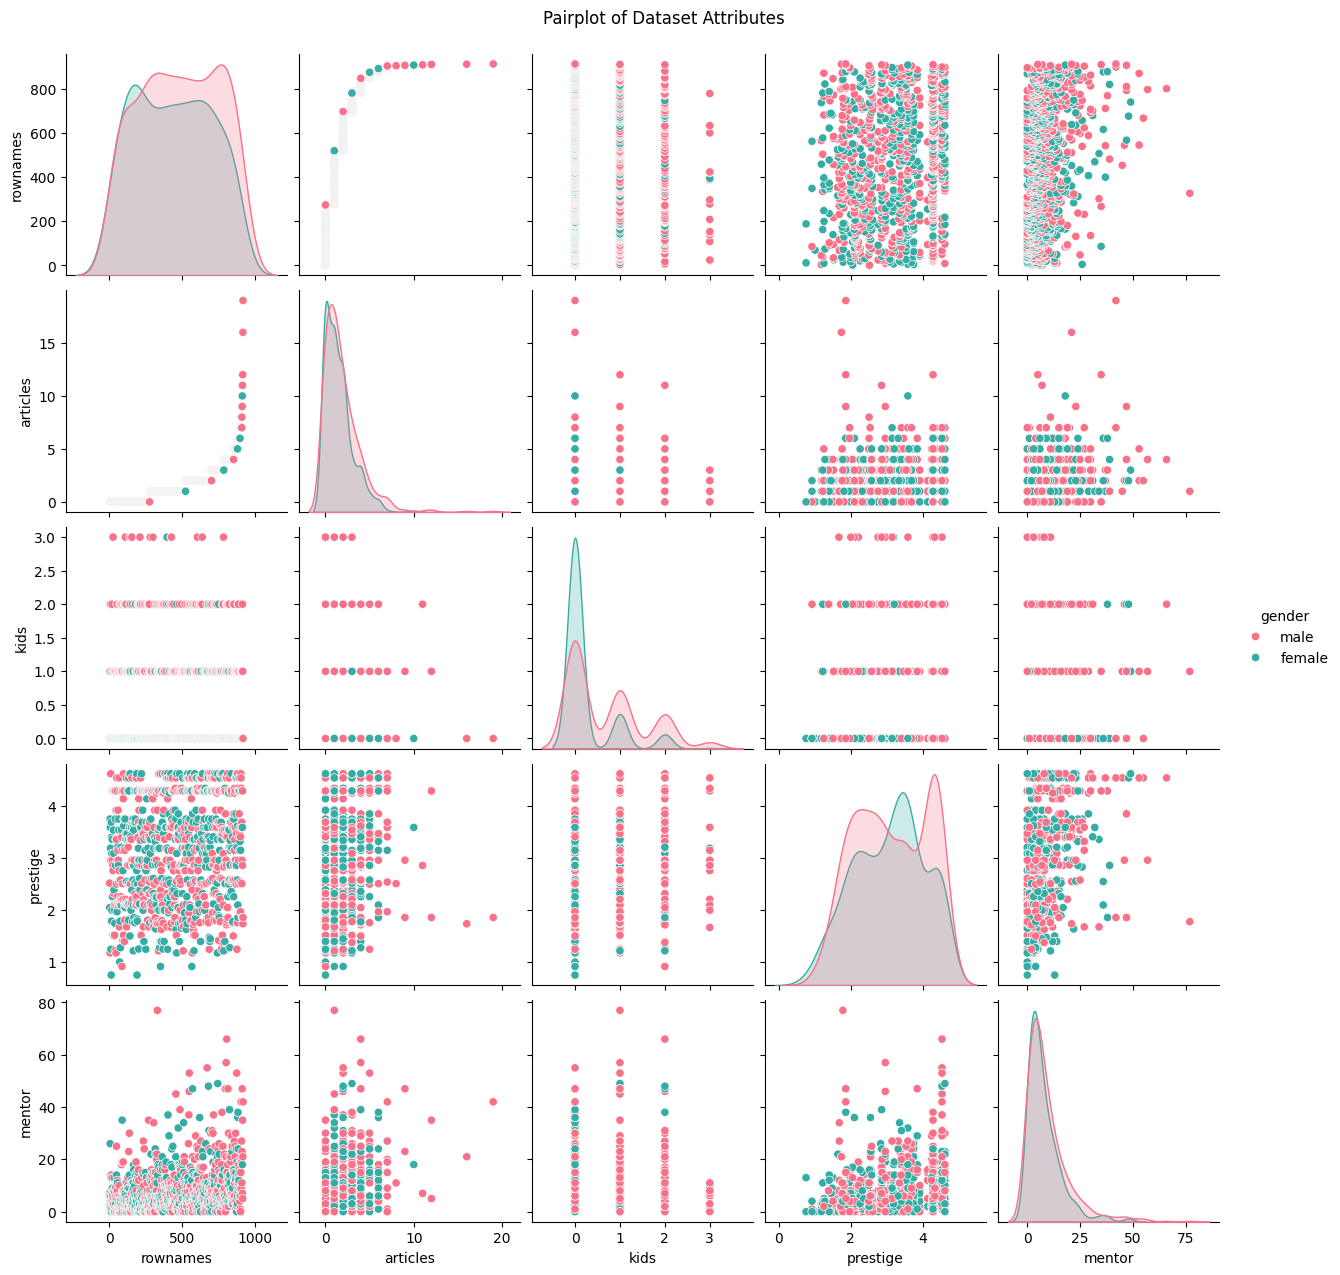

In [41]:
plt.figure(figsize=(8,6))
sns.pairplot(df, hue='gender', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Dataset Attributes', y=1.02)
plt.show()

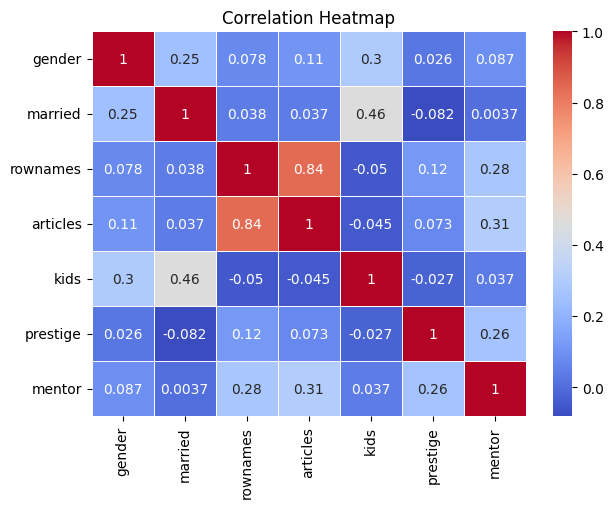

In [42]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in ['gender', 'married']:
    df[column] = label_enc.fit_transform(df[column])
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(7,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# FUNDAMENTALS OF TIME SERIES ANALYSIS (TSA)

# Importing necessary libraries

In [62]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Time-Based Indexing

In [63]:
df['rownames'] = pd.to_datetime(df['rownames'], format='%Y', errors='coerce')
df.set_index('rownames', inplace=True)
print("\nFirst 5 Rows of Time Series Data:")
print(df.head())


First 5 Rows of Time Series Data:
          gender  married  articles  kids  prestige  mentor  \
rownames                                                      
NaT            1        1         0     0      2.52       7   
NaT            0        0         0     0      2.05       6   
NaT            0        0         0     0      3.75       6   
NaT            1        1         0     1      1.18       3   
NaT            0        0         0     0      3.75      26   

         articles_bins_width mentor_bins_freq prestige_category  
rownames                                                         
NaT                 Very Low               Q3              Good  
NaT                 Very Low               Q2           Average  
NaT                 Very Low               Q2         Excellent  
NaT                 Very Low               Q1               Low  
NaT                 Very Low               Q4         Excellent  


# 4. Checking Stationarity (ADF Test)

In [66]:
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f"{label}: {value}")
    if result[1] <= 0.05:
        print("\nThe series is stationary.")
    else:
        print("\nThe series is not stationary. Differencing may be required.")

print("\nADF Test for 'articles':")
adf_test(df['articles'])


ADF Test for 'articles':
ADF Statistic: 0.37214116913696405
p-value: 0.9804226907130649
#Lags Used: 19
Number of Observations Used: 895

The series is not stationary. Differencing may be required.


# 5. TSA with Open Power System Data (Example)

# Load Open Power System Data (for comparison and practice)

In [67]:
opsd_url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
opsd = pd.read_csv(opsd_url, parse_dates=['Date'], index_col='Date')

# Quick plot of power system data

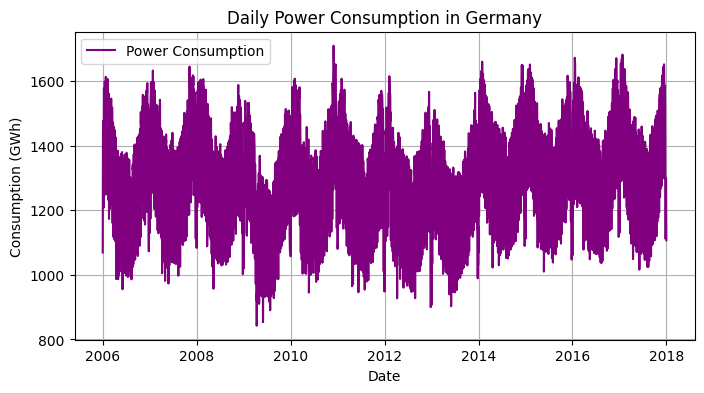

In [68]:
plt.figure(figsize=(8,4))
plt.plot(opsd['Consumption'], label='Power Consumption', color='purple')
plt.title('Daily Power Consumption in Germany')
plt.xlabel('Date')
plt.ylabel('Consumption (GWh)')
plt.grid(True)
plt.legend()
plt.show()

# 5. Optional: Reset Index if Needed

In [78]:
df_reset = df.reset_index()
print("\nDataFrame with 'rownames' Restored as Column:")
print(df_reset.head())


DataFrame with 'rownames' Restored as Column:
                       rownames  articles  gender married  kids  prestige  \
0 1970-01-01 00:00:00.000000001         0    male     yes     0      2.52   
1 1970-01-01 00:00:00.000000002         0  female      no     0      2.05   
2 1970-01-01 00:00:00.000000003         0  female      no     0      3.75   
3 1970-01-01 00:00:00.000000004         0    male     yes     1      1.18   
4 1970-01-01 00:00:00.000000005         0  female      no     0      3.75   

   mentor  
0       7  
1       6  
2       6  
3       3  
4      26  


# 8. Autocorrelation and Partial Autocorrelation

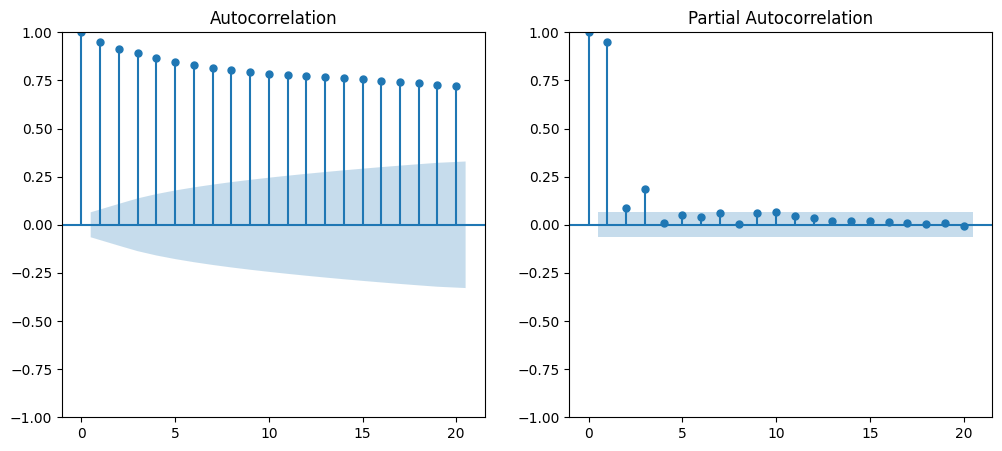

In [72]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(df['articles'].dropna(), lags=20, ax=plt.gca(), title='Autocorrelation')
plt.subplot(122)
plot_pacf(df['articles'].dropna(), lags=20, ax=plt.gca(), title='Partial Autocorrelation')
plt.show()
